In [1]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

C:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

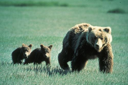

In [3]:
dest = 'images/grizzly/00000000.jpg'
im = Image.open(dest)
im.to_thumb(128,128)

In [4]:
bear_types = "grizzly", "black", "teddy"
path = Path("images")
fns = get_image_files(path)
fns

(#516) [Path('images/black/00000000.jpg'),Path('images/black/00000001.png'),Path('images/black/00000003.jpg'),Path('images/black/00000004.jpg'),Path('images/black/00000005.jpg'),Path('images/black/00000006.jpg'),Path('images/black/00000008.jpg'),Path('images/black/00000009.jpg'),Path('images/black/00000010.jpg'),Path('images/black/00000012.jpg')...]

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


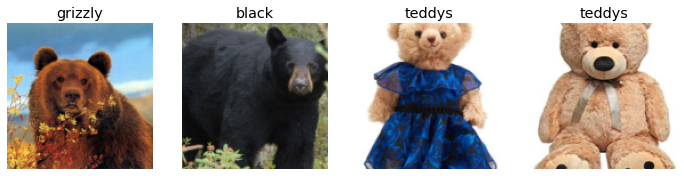

In [5]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
)

dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [6]:
failed = verify_image(fns)
failed

False

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


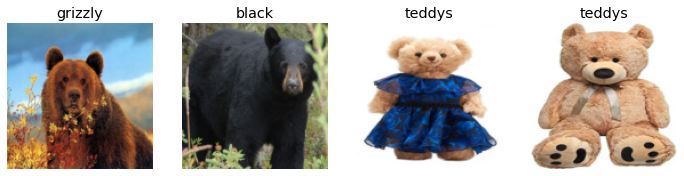

In [7]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


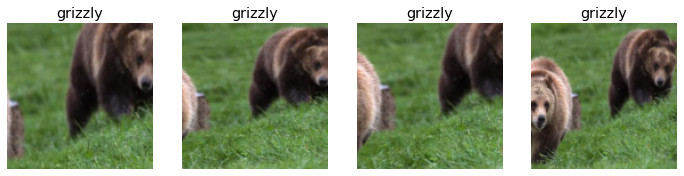

In [8]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


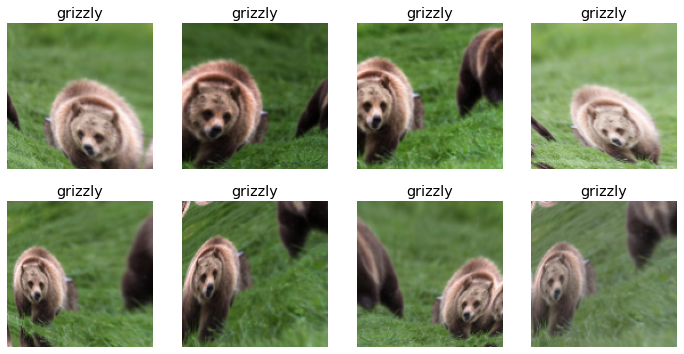

In [9]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [10]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.126984,0.168738,0.048544,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.195731,0.052878,0.019417,01:01
1,0.135908,0.048675,0.019417,01:07
2,0.098386,0.045103,0.029126,01:05


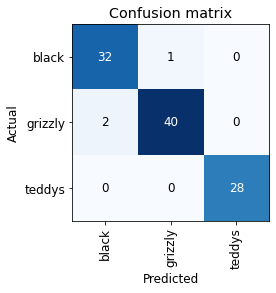

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

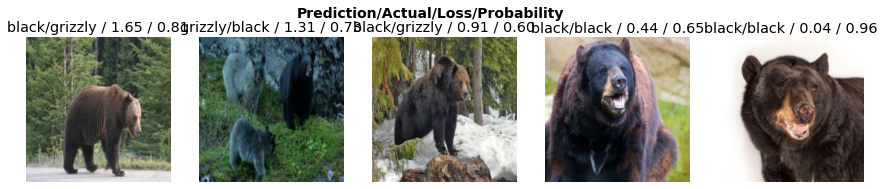

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.export()
path = Path()
path.ls(file_exts=".pkl")